In [ ]:
# pivot 1 : fairface data exploration, data audit, cleaning and rebalancing
# the goal is to prepare and balance the fairface dataset by race and gender for bias analysis and model training

In [1]:
!find . -name "fairface_label_train.csv"
# first thing is locating where the FairFace csv files are in the project

./capestone-fairness-audit/labels/fairface_label_train.csv
./capestone-fairness-audit/data/fairface_full/fairface_label_train.csv


In [2]:
import pandas as pd

train_df = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_train.csv")
val_df = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_val.csv")

print("Train set :")
display(train_df.head())

print("\nValidation set :")
display(val_df.head())
# then I loaded train and validation csvs with demographic labels nd checked everything was ok

Train set :


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True



Validation set :


,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [3]:
import os

os.getcwd()

'/files'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

train_df["split"] = "train"
val_df["split"] = "val"

full_df = pd.concat([train_df, val_df], ignore_index=True)

full_df[["race", "gender", "age"]].describe(include="all")
# I merged the train and validation sets to get an overview of the full dataset and check the distributions of race, gender, and age to see if balancing was needed

,race,gender,age
count,97698,97698,97698
unique,7,2,9
top,White,Male,20-29
freq,18612,51778,28898


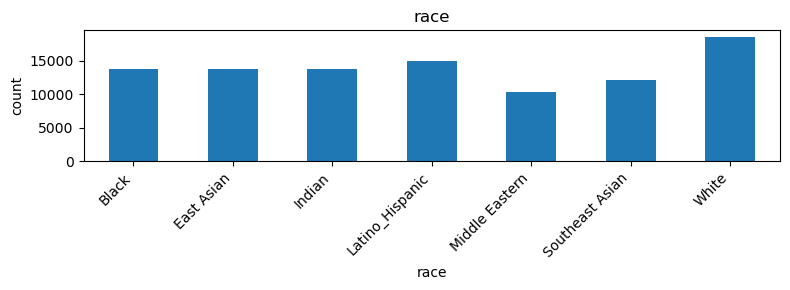

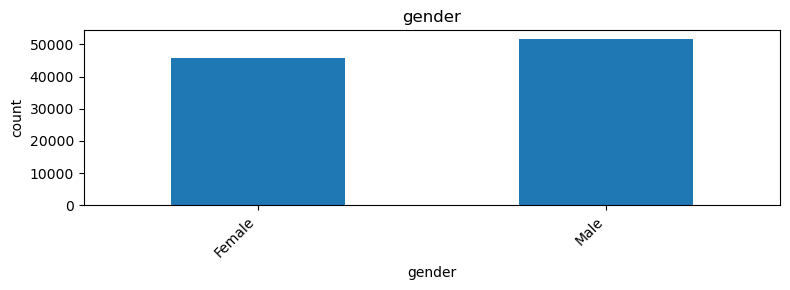

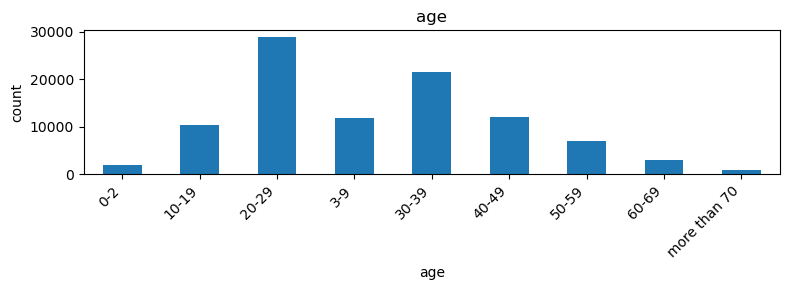

In [5]:
for col in ["race", "gender", "age"]:
    counts = full_df[col].value_counts().sort_index()
    plt.figure(figsize=(8, 3))
    counts.plot(kind="bar")
    plt.title(col)
    plt.ylabel("count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    # raw data graphics :
    # we can see that we have 7 ethnics group, but white people are more representated
    # the gender are almost 50-50 with a little more male
    # the distribution is more concentrated for people around 20-29 and 30-39
    # I have to be aware and pay attention to those because that can lead to biaises

In [8]:
import os

os.chdir("/files/capestone-fairness-audit")

print("Current path:", os.getcwd())
print("Contenu du dossier :", os.listdir())
# checking what’s inside to see if i’m working in the right place.

Current path: /files/capestone-fairness-audit
Contenu du dossier : ['requirements.txt', 'src', 'README.md', 'tests', 'notebooks', 'labels', 'LICENSE', '.git', '.venv', '.ipynb_checkpoints', 'data', '.gitignore']


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
TARGET_TRAIN_PER_GROUP = 500
TARGET_VAL_PER_GROUP = 150
DATA_DIR = "data/fairface_full" 
# imported main libraries and defined configuration : seed value, samples per group, and dataset path

In [12]:
def load_fairface_labels(data_dir):
    """Charge les CSV de FairFace."""
    train_df = pd.read_csv(f"{data_dir}/fairface_label_train.csv")
    val_df = pd.read_csv(f"{data_dir}/fairface_label_val.csv")
    return train_df, val_df


def balance_by_race_gender(df, target_per_group, random_state=RANDOM_SEED):
    """balanced dataset for genre and ethnicity."""
    grouped = df.groupby(["race", "gender"], group_keys=False)
    return grouped.apply(
        lambda g: g.sample(
            n=min(target_per_group, len(g)),
            random_state=random_state
        )
    )
# defining two helper functions: one to load the fairface csvs and another to balance the dataset by race and gender

In [13]:
train_df, val_df = load_fairface_labels(DATA_DIR)

balanced_train = balance_by_race_gender(train_df, TARGET_TRAIN_PER_GROUP)
balanced_val = balance_by_race_gender(val_df, TARGET_VAL_PER_GROUP)

print("Balanced train size:", len(balanced_train))
print(balanced_train[["race", "gender"]].value_counts().sort_index())

print("\nBalanced validation size:", len(balanced_val))
print(balanced_val[["race", "gender"]].value_counts().sort_index())
# loaded the data, balanced both splits and printed the size of each to be sure all was consistent

Balanced train size: 7000
race             gender
Black            Female    500
                 Male      500
East Asian       Female    500
                 Male      500
Indian           Female    500
                 Male      500
Latino_Hispanic  Female    500
                 Male      500
Middle Eastern   Female    500
                 Male      500
Southeast Asian  Female    500
                 Male      500
White            Female    500
                 Male      500
Name: count, dtype: int64

Balanced validation size: 2100
race             gender
Black            Female    150
                 Male      150
East Asian       Female    150
                 Male      150
Indian           Female    150
                 Male      150
Latino_Hispanic  Female    150
                 Male      150
Middle Eastern   Female    150
                 Male      150
Southeast Asian  Female    150
                 Male      150
White            Female    150
                 Male      150


/tmp/ipykernel_134/1525824095.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(
/tmp/ipykernel_134/1525824095.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(


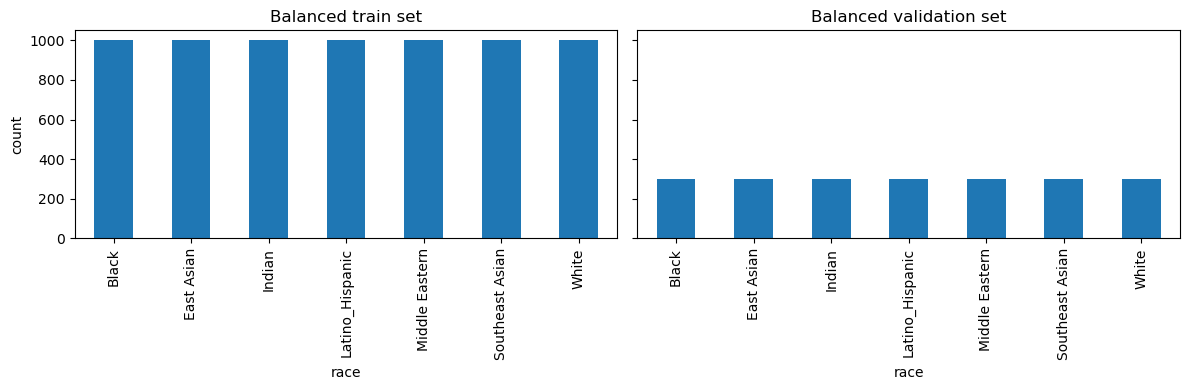

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

balanced_train["race"].value_counts().sort_index().plot(kind="bar", ax=axes[0])
axes[0].set_title("Balanced train set")
axes[0].set_xlabel("race")
axes[0].set_ylabel("count")

balanced_val["race"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Balanced validation set")
axes[1].set_xlabel("race")

plt.tight_layout()
plt.show()
# balanced dataset graphics
# Nb: i've decided to balance race and gender, since these are the main sources of bias in facial recognition models.
# balancing by age would have fragmented the data and reduce sample diversity.

In [15]:
balanced_train.to_csv("balanced_train.csv", index=False)
balanced_val.to_csv("balanced_val.csv", index=False)
print("saved")

saved


In [ ]:
# fairface dataset contain images of the faces, however its 7GB.
# i can't upload it on nuvolos as it max 4BG.
# hence sorted it out on my laptop with python to have only the images from my balenced set so I can upload it here

In [21]:
import os

train_path = "data/balanced_images/train"
val_path = "data/balanced_images/val"

if os.path.exists(train_path):
    print("train images ok :", len(os.listdir(train_path)), "images")
else:
    print("train images not ok ")

if os.path.exists(val_path):
    print("val images ok :", len(os.listdir(val_path)), "images")
else:
    print("val images not ok ")

train images ok : 7000 images
val images ok : 2100 images


In [23]:
import pandas as pd


train_df = pd.read_csv("balanced_train.csv")
val_df = pd.read_csv("balanced_val.csv")

missing_train = [f for f in train_df["file"] if not os.path.exists(os.path.join(train_path, os.path.basename(f)))]
missing_val = [f for f in val_df["file"] if not os.path.exists(os.path.join(val_path, os.path.basename(f)))]

print("Missing in train:", len(missing_train))
print("Missing in val:", len(missing_val))
# check every csv match an image

Missing in train: 0
Missing in val: 0


In [ ]:
# data set preparation and validation ready to use

In [3]:
#load the data
import os
import pandas as pd
from tqdm import tqdm


DATA_DIR = "data/balanced_images"
TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train")
VAL_IMG_DIR = os.path.join(DATA_DIR, "val")

#way
train_labels = pd.read_csv("capestone-fairness-audit/balanced_train.csv")
val_labels = pd.read_csv("capestone-fairness-audit/balanced_val.csv")

print("loaded data :")
print("Train :", len(train_labels), "images")
print("Val :", len(val_labels), "images")

loaded data :
Train : 7000 images
Val : 2100 images


In [2]:
# final note:
# this balanced dataset will serve as the input for pivot 2, 
# where i’ll train a model to predict bias patterns.